In [1]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn import metrics
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("adult.csv")

print (data.shape)
data.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
country           32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
#Data Cleaning

# Check missing values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [4]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [5]:
# remove rows where values are unknown

data = data[data.occupation != '?']
raw_data = data[data.occupation != '?']
data['country'] = data['country'].replace(' ?',np.nan)
data['workclass'] = data['workclass'].replace(' ?',np.nan)
data['occupation'] = data['occupation'].replace(' ?',np.nan)
data.dropna(how='any',inplace=True)

print (data.shape)
data.head(5)

(30162, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106316b90>,
      dtype=object)

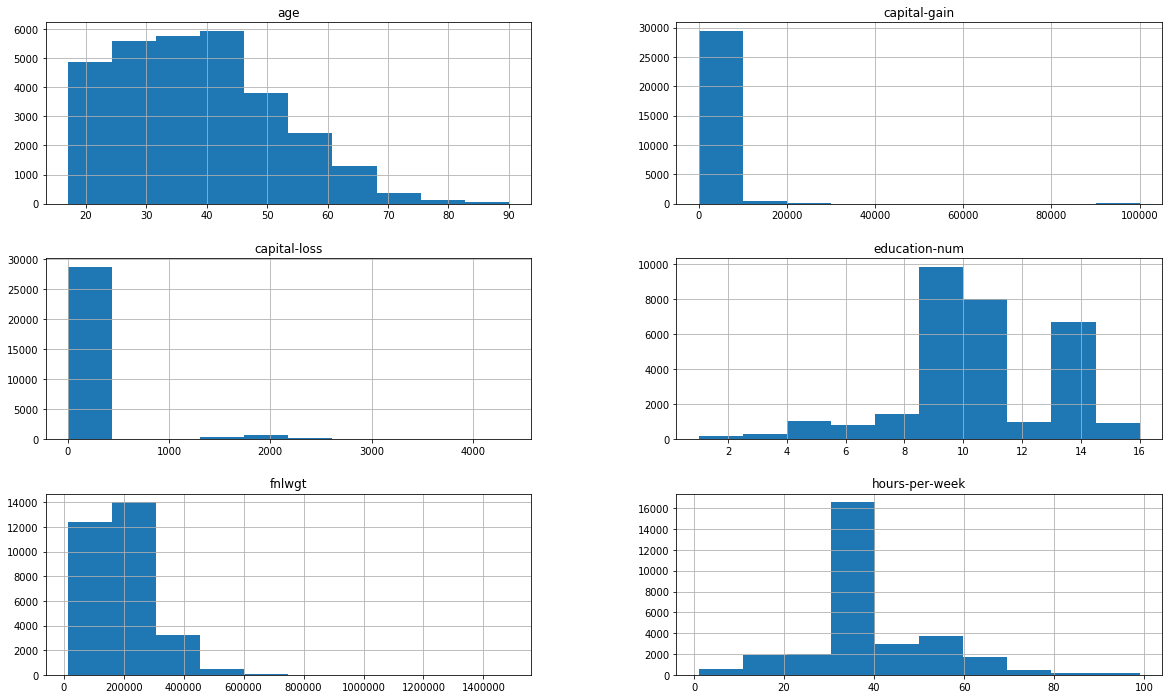

In [6]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 12
data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

#fnlwgt, capital-gain & capital-loss is skewed
#education can be grouped

In [7]:
# create new numerical columns to represent the categorical data

data['workclass_num'] = data.workclass.map({' Private':0, ' State-gov':1, ' Federal-gov':2, ' Self-emp-not-inc':3, ' Self-emp-inc':4, ' Local-gov':5, ' Without-pay':6})
data['marital_num'] = data['marital-status'].map({' Widowed':0, ' Divorced':1, ' Separated':2, ' Never-married':3, ' Married-civ-spouse':4, ' Married-AF-spouse':4, ' Married-spouse-absent':5})
data['race_num'] = data.race.map({' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3, ' Other':4}).astype(int)
data['sex_num'] = data['sex'].map({' Male': 1, ' Female':0})
data['rel_num'] = data.relationship.map({' Not-in-family':'0', ' Unmarried':'0', ' Own-child':'0', ' Other-relative':'0', ' Husband':'1', ' Wife':'1'})
data['education_num'] = data['education-num'].map({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0,13:1,14:2,15:2, 16:3})
data['salary']= data['salary'].map({' <=50K': 0, ' >50K': 1})

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,capital-loss,hours-per-week,country,salary,workclass_num,marital_num,race_num,sex_num,rel_num,education_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,0,1,3,0,1,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,0,3,4,0,1,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,0,0,1,0,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,0,0,4,1,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,0,0,4,1,0,1,1


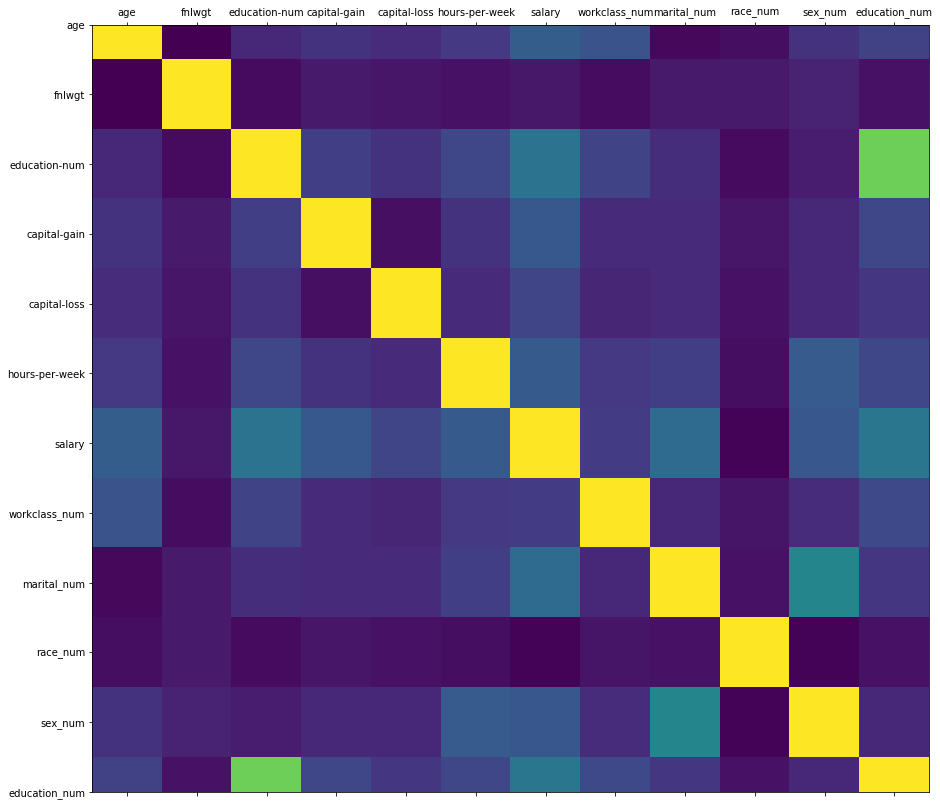

In [8]:
def plot_correlation(data, size=15):
    corr= data.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

plot_correlation(data)

#fnlwgt and race-num to be removed as no co relation with output class salary

Text(0.5, 0, 'Workclass')

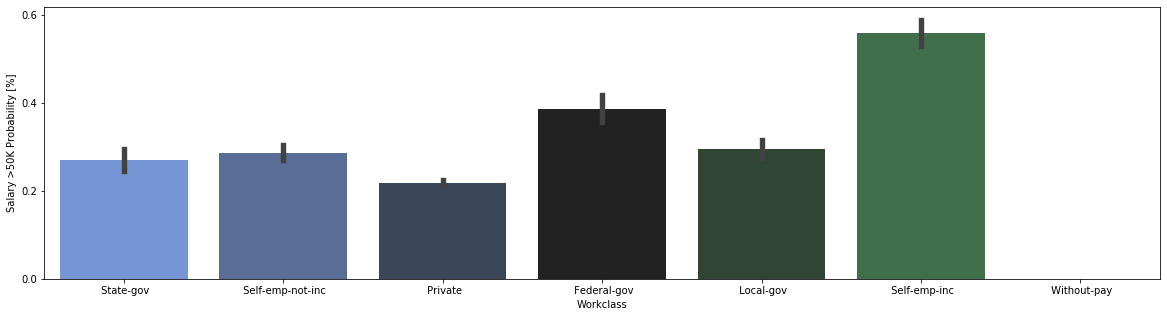

In [9]:
#workclass

fig, ax = plt.subplots(figsize=(20,5))
sns.set_context("poster")
current_palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark")

fig = sns.barplot(x='workclass',y='salary',data=data,palette=current_palette)

fig.set_ylabel("Salary >50K Probability [%]")
fig.set_xlabel("Workclass")

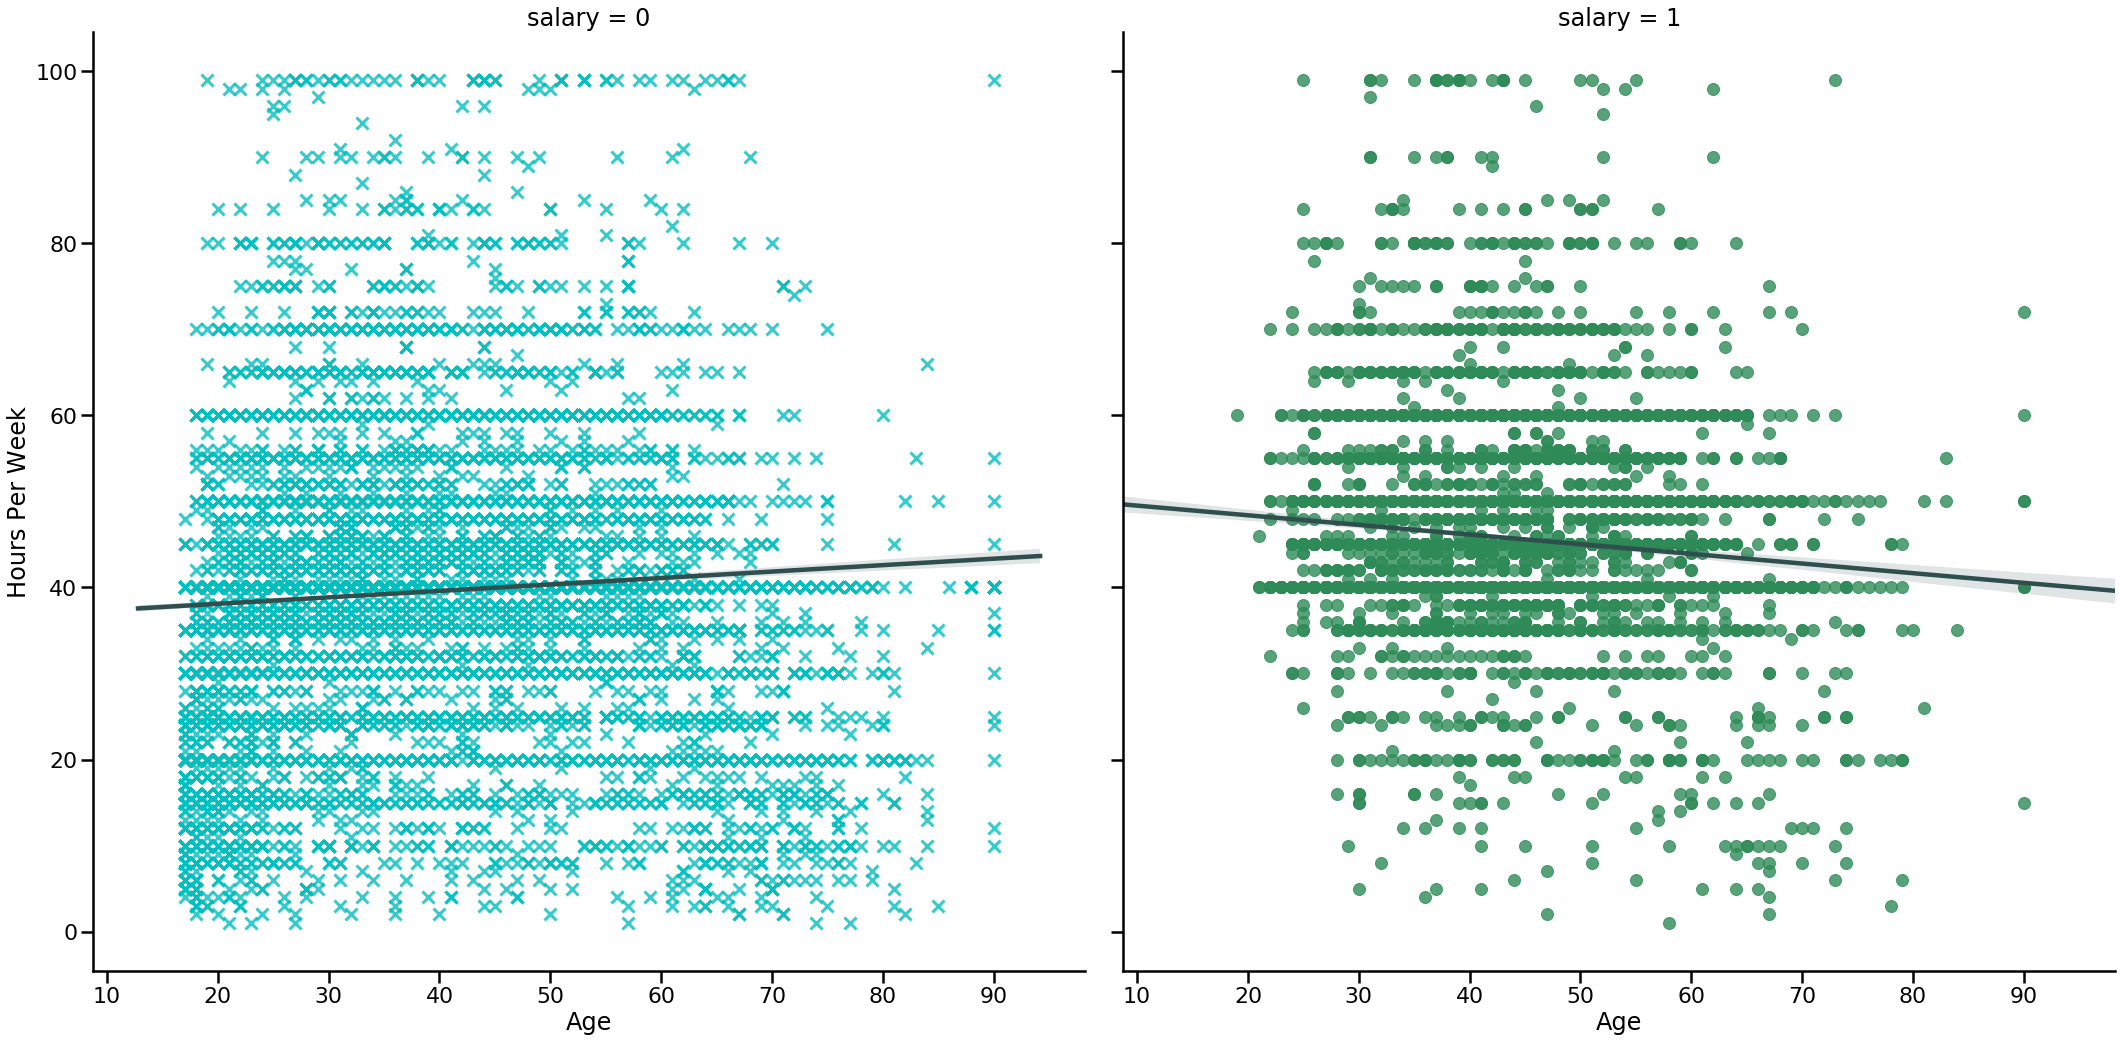

In [10]:
#linear regression plots show the correlation between age and length of work weeks among adults who earn under and over 50k

sns.set_context("poster")
g=sns.lmplot(x="age",y='hours-per-week',hue='salary',col="salary",data=data,markers= ['x','o'],palette=["c",'seagreen'],height=15,line_kws={'color': 'darkslategray'})

g= (g.set_axis_labels("Age","Hours Per Week"))

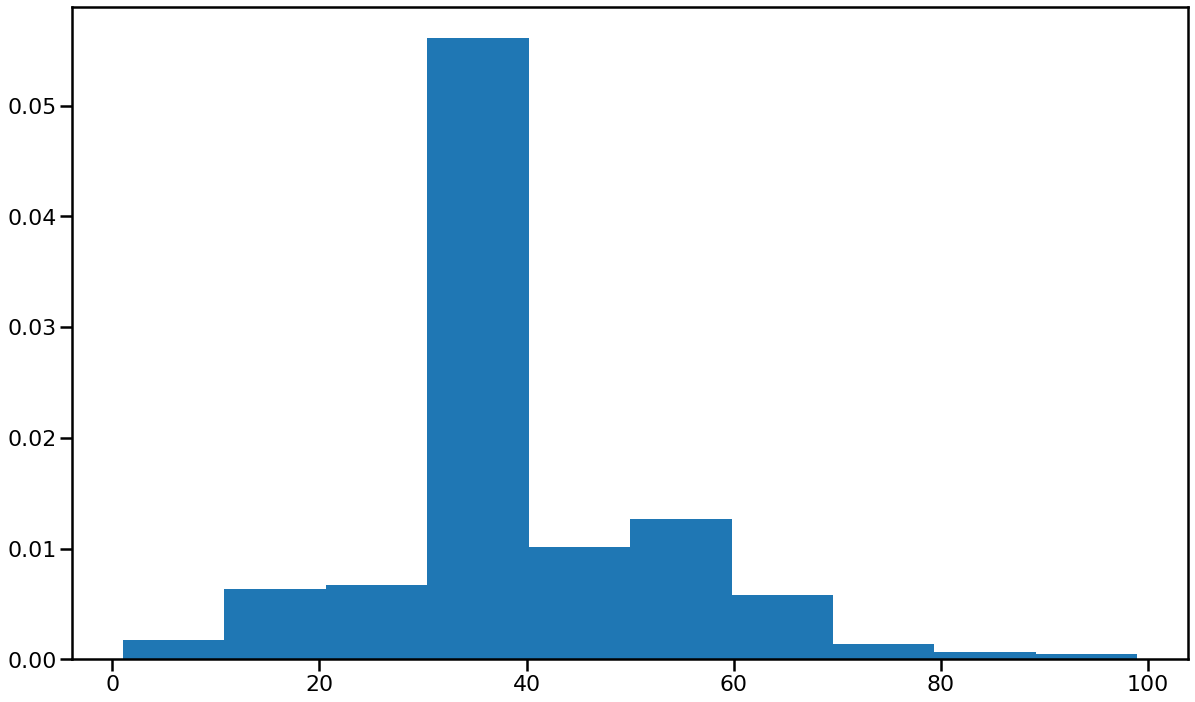

In [11]:
#hours-per-week

x= data['hours-per-week']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

In [12]:
#looking at the % of population distribution for below:

data[['relationship','salary']].groupby(['relationship']).mean()

,salary
relationship,
Husband,0.455669
Not-in-family,0.106523
Other-relative,0.039370
Own-child,0.014330
Unmarried,0.066314
Wife,0.493599


In [13]:
data[['relationship','rel_num','salary']].groupby(['relationship','rel_num']).mean()

,,salary
relationship,rel_num,
Husband,1,0.455669
Not-in-family,0,0.106523
Other-relative,0,0.039370
Own-child,0,0.014330
Unmarried,0,0.066314
Wife,1,0.493599


In [14]:
data[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Divorced,0.107262
Married-AF-spouse,0.476190
Married-civ-spouse,0.454959
Married-spouse-absent,0.083784
Never-married,0.048324
Separated,0.070288
Widowed,0.096735


In [15]:
data[['marital_num','marital-status','salary']].groupby(['marital-status', 'marital_num']).mean()

,,salary
marital-status,marital_num,
Divorced,1,0.107262
Married-AF-spouse,4,0.476190
Married-civ-spouse,4,0.454959
Married-spouse-absent,5,0.083784
Never-married,3,0.048324
Separated,2,0.070288
Widowed,0,0.096735


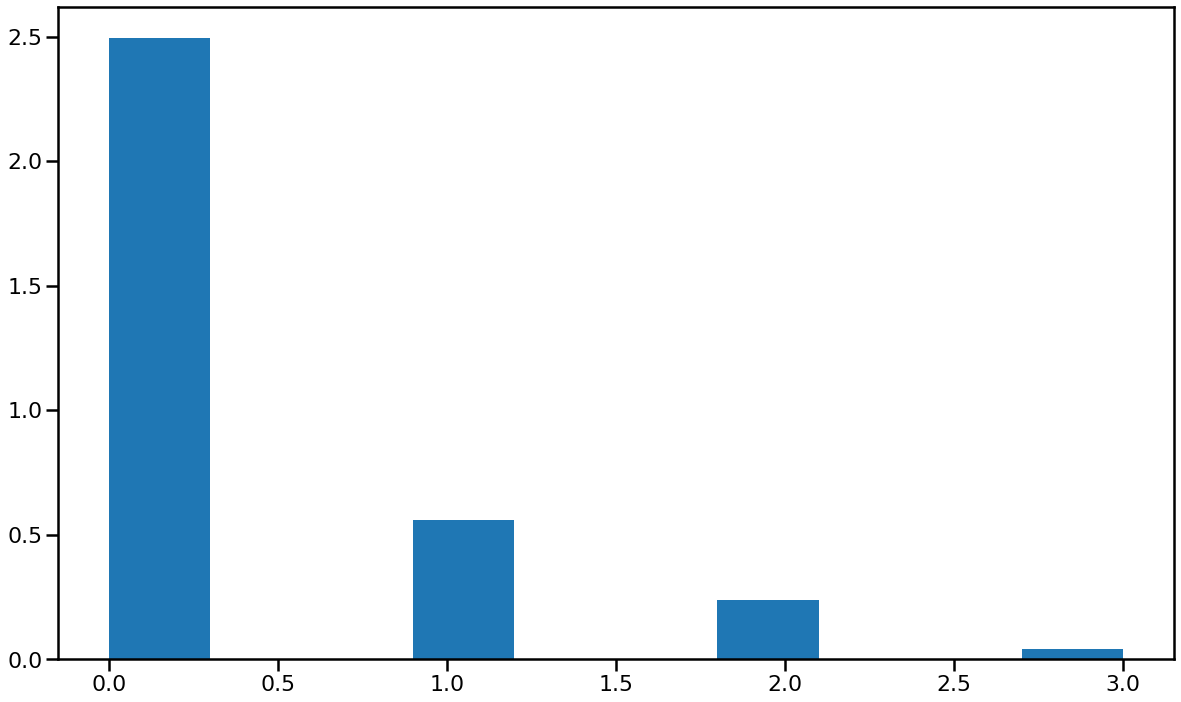

In [16]:
#education_num

x= data['education_num']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

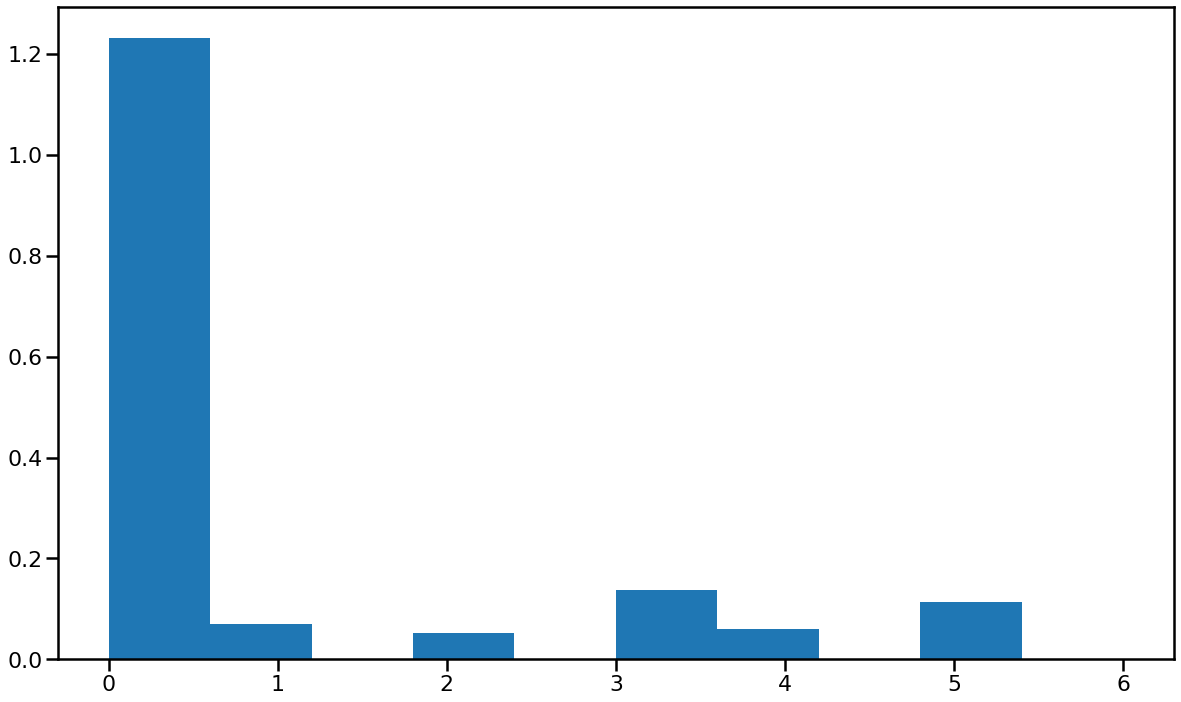

In [17]:
#workclass_num

x= data['workclass_num']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

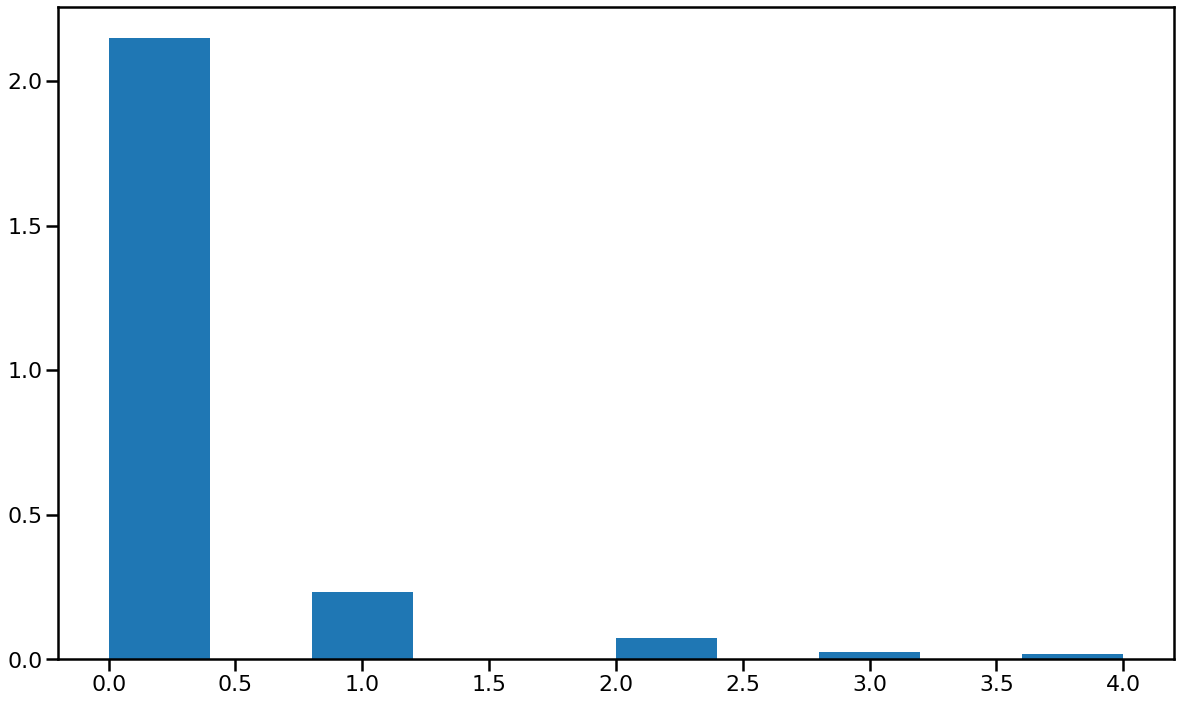

In [18]:
x= data['race_num']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

#highly skewed hence to be removed

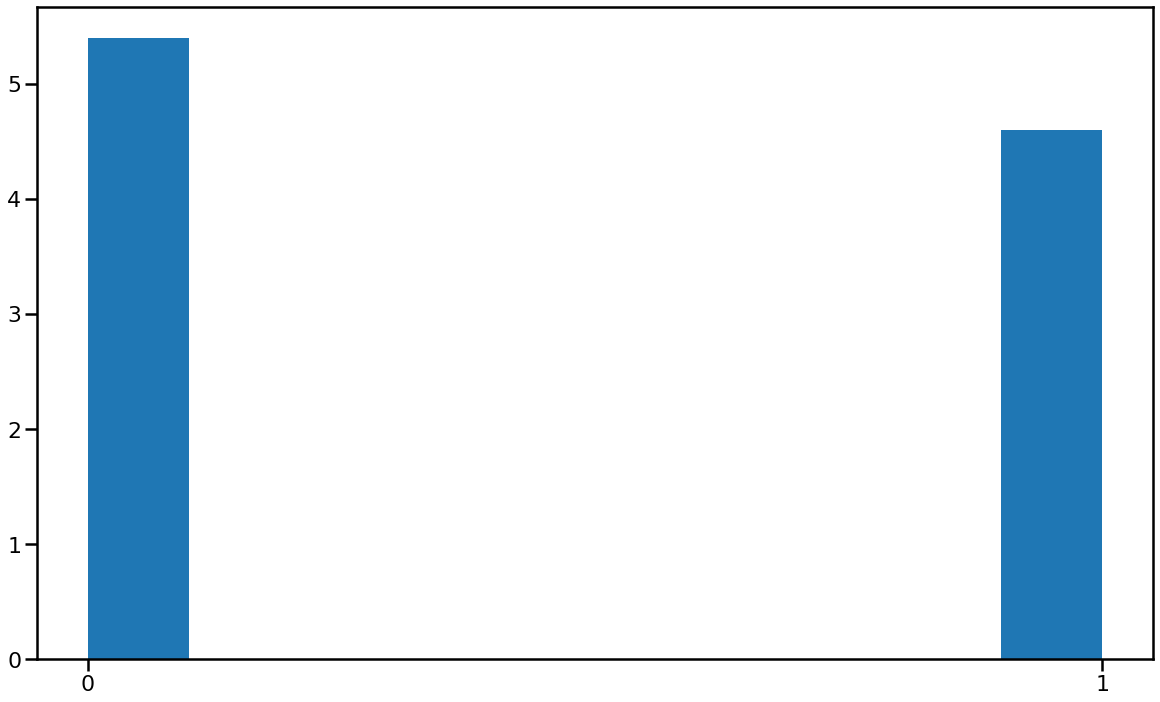

In [19]:
x= data['rel_num']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

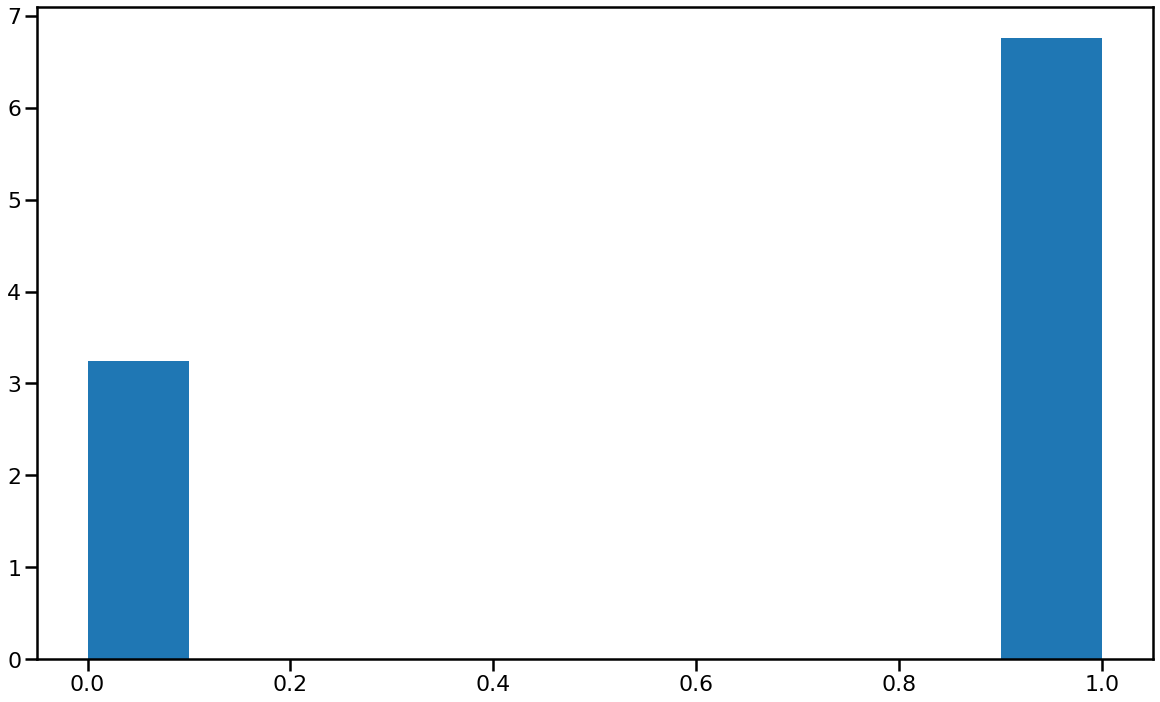

In [20]:
x= data['sex_num']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

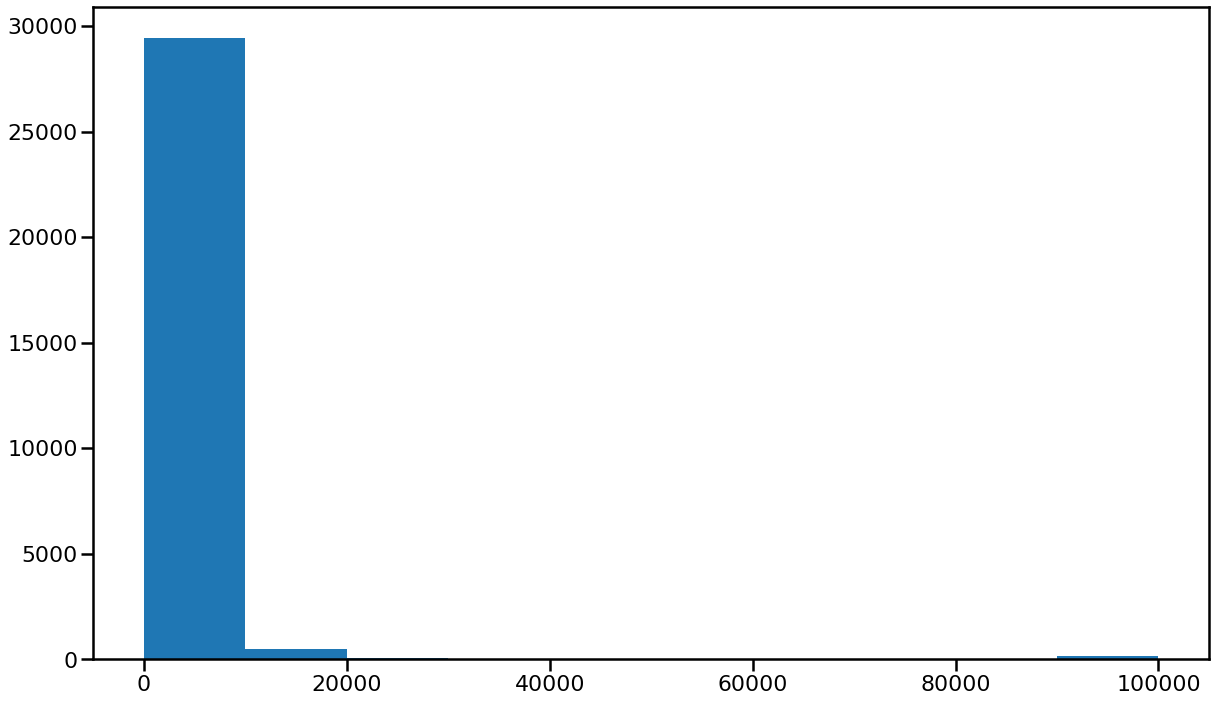

In [21]:
x=data['capital-gain']
plt.hist(x,bins=None,normed=None)
plt.show()

In [22]:
#combining values to 0 & 1 capital-gain
data.loc[(data['capital-gain'] > 0),'capital-gain'] = 1
data.loc[(data['capital-gain'] == 0 ,'capital-gain')]= 0

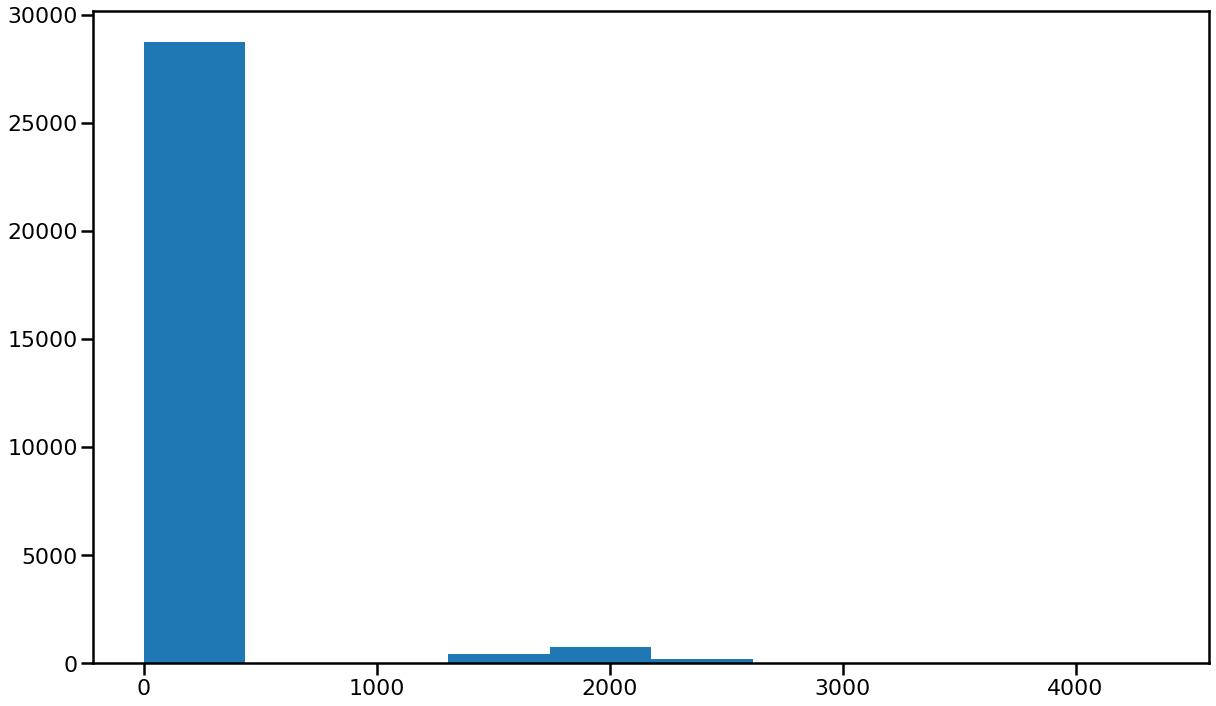

In [23]:
x=data['capital-loss']
plt.hist(x,bins=None)
plt.show()

In [24]:
#combining values to 0 & 1 for capital-loss
data.loc[(data['capital-loss'] > 0),'capital-loss'] = 1
data.loc[(data['capital-loss'] == 0 ,'capital-loss')]= 0


In [25]:
#creating a new column by taking difference of 2 columns

data['capital-diff'] = data['capital-gain'] - data['capital-loss']
data.drop(['capital-loss'], axis = 1, inplace = True)
data.drop(['capital-gain'], axis = 1, inplace = True)

In [26]:
country_count = data['country'].value_counts()
country_count

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

Text(0.5, 1.0, 'population from each country')

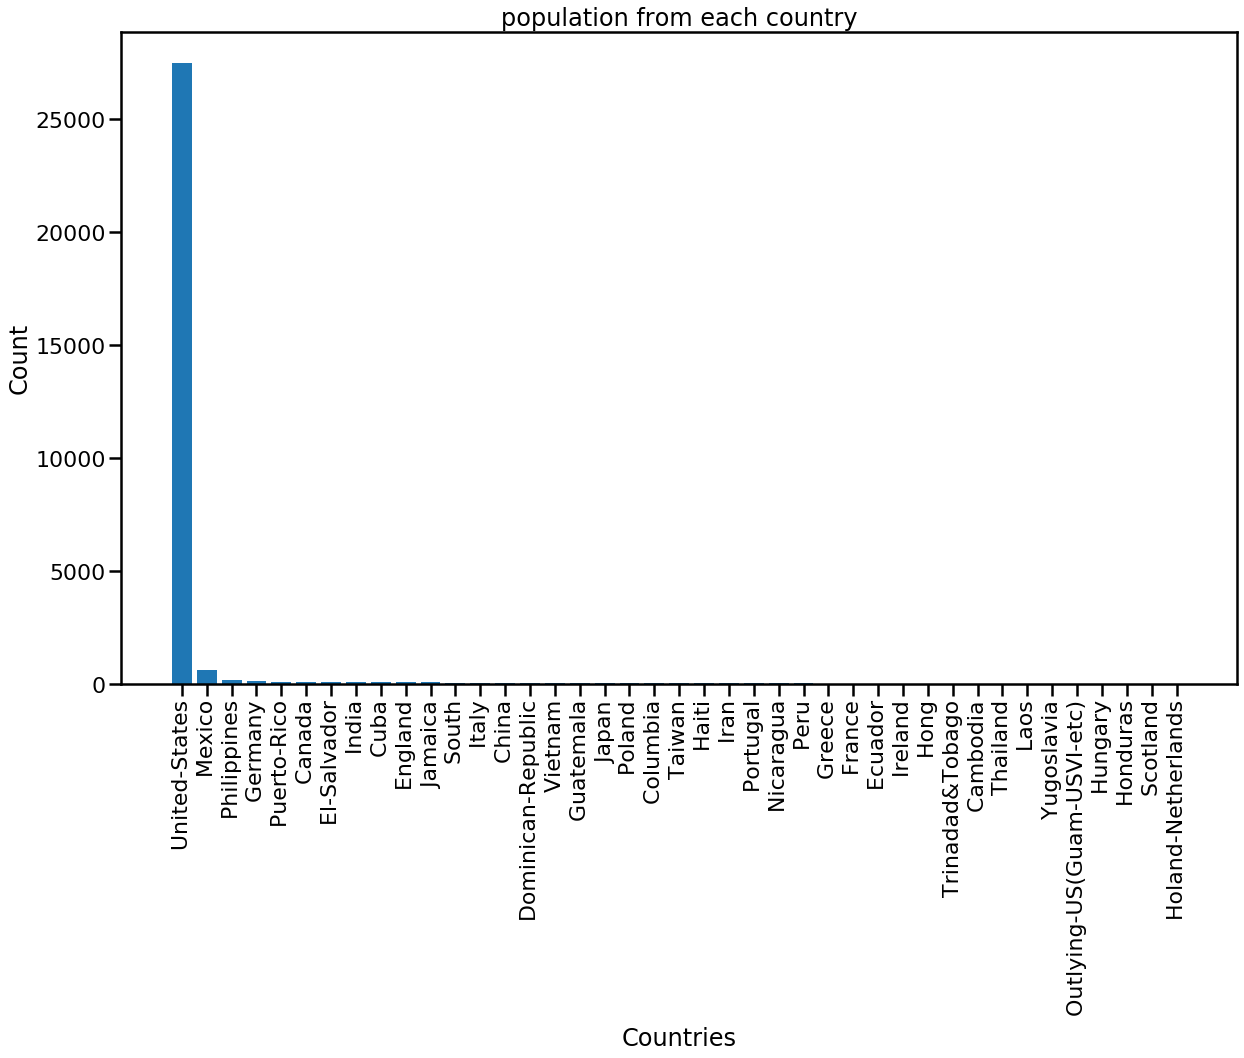

In [27]:
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('population from each country')

#mostly USA hence not considered

In [28]:
#selecting our columns for the model

X = data[['age', 'workclass_num', 'fnlwgt','education_num', 'marital_num', 'rel_num', 'capital-diff']]
y = data.salary

In [29]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [30]:
#Modelling

models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM','GradientBoostingClassifier']

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))
models.append((GradientBoostingClassifier()))

accuracies = []

In [31]:
kfold = model_selection.KFold(n_splits=10,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score*100))
    
    y_pred = score.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

----------------------------------------
LR: 74.92304049254085
----------------------------------------
Random Forest: 79.18541321335543
----------------------------------------
Neural Network: 74.94672034098981
----------------------------------------
GaussianNB: 74.92304049254085
----------------------------------------
DecisionTreeClassifier: 76.65166942931565
----------------------------------------
SVM: 74.89936064409187
----------------------------------------
GradientBoostingClassifier: 83.51882547951693


In [32]:
accuracies

[75.21273068847385,
 79.67731241021107,
 75.566360923859,
 75.21273068847385,
 76.75986296828378,
 75.23483257818543,
 83.05890153608134]

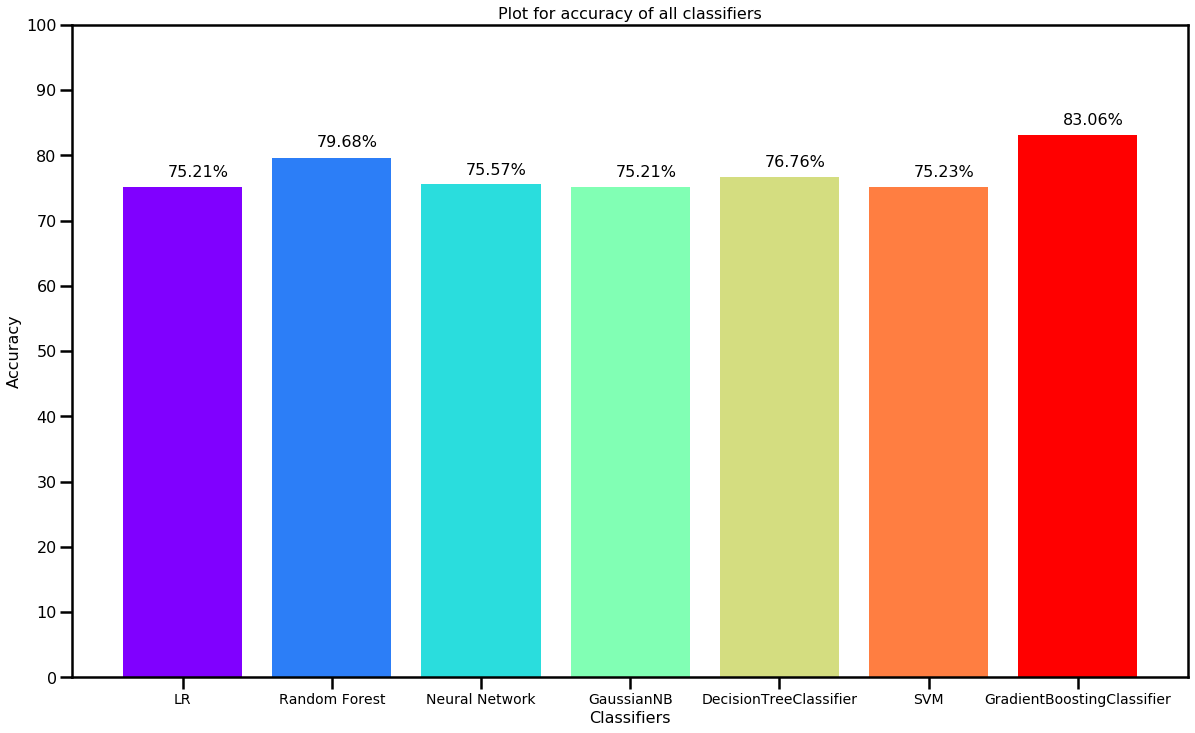

In [33]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(models)))
barplot = plt.bar(names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

In [ ]:
#Hence the best model is GradientBoostingClassifier with accuracy of 83 %